## Convert a GTFS feed's files into more workable-with merged form, aggregates, and create route lines shapefile

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [2]:
stopsf = 'gtfs/stops.txt'
routesf = 'gtfs/routes.txt'
tripsf = 'gtfs/trips.txt'
stf = 'gtfs/stop_times.txt'

In [3]:
df_st = pd.read_csv(stf)

In [4]:
df_t = pd.read_csv(tripsf)

In [5]:
df_r = pd.read_csv(routesf)

In [6]:
df_s = pd.read_csv(stopsf)

## merge routes into trips

In [7]:
df1 = pd.merge(df_t, df_r, on='route_id', how='left')

In [8]:
df1.sample(5)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,...,duty_sequence_number,run_sequence_number,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
20728,36_47,1,NORMAL_36_Ma Na Pa To Chinchwadgaon_Up-1810_0,Ma Na Pa To Chinchwadgaon,NaN,0,NaN,3306,NaN,NaN,...,11,3,PMPML,36,Ma.Na. Pa to Chinchwad gaon,NaN,3,NaN,NaN,NaN
6156,58,1,NORMAL_58_Shanipar To Gokhalenagar_Up-1030_0,Shanipar To Gokhalenagar,NaN,0,NaN,3581,NaN,NaN,...,9,9,PMPML,58,NaN,NaN,3,NaN,NaN,NaN
19493,7A,1,NORMAL_7A_Hadapsar Gadital To Uruli Kanchan_Up...,Hadapsar Gadital To Uruli Kanchan,NaN,0,NaN,4370,NaN,NaN,...,11,1,PMPML,7A,NaN,NaN,3,NaN,NaN,NaN
21675,26,1,NORMAL_26_Shivajinagar To Dhankawadi_Down-1140_0,Shivajinagar To Dhankawadi,NaN,0,NaN,2923,NaN,NaN,...,6,6,PMPML,26,NaN,NaN,3,NaN,NaN,NaN
1894,149,1,NORMAL_149_Shewalwadi To Bhakti Shakti_Up-1445_0,Shewalwadi To Bhakti Shakti,NaN,0,NaN,4629,NaN,NaN,...,5,1,PMPML,149,NaN,NaN,3,NaN,NaN,NaN


## merge trips+routes into stop_times

In [9]:
df2 = pd.merge(df_st, df1, on='trip_id', how='left')

In [10]:
df2.sample(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,duty_sequence_number,run_sequence_number,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
287146,NORMAL_185_Wagholi Kesnand To Hadapsar Gadital...,09:45:48,09:46:01,32489,20,NaN,NaN,NaN,NaN,NaN,...,6,6,PMPML,185,NaN,NaN,3,NaN,NaN,NaN
139864,NORMAL_VJR3_Kothrud Depot To Hadapsar Gadital_...,07:35:27,07:36:18,39030,5,NaN,NaN,NaN,NaN,NaN,...,2,2,PMPML,VJR3,NaN,NaN,3,NaN,NaN,NaN
271742,NORMAL_13_Shivajinagar To Upper Depot_Down-1235_0,13:06:17,13:06:30,39678,17,NaN,NaN,NaN,NaN,NaN,...,8,8,PMPML,13,NaN,NaN,3,NaN,NaN,NaN
159948,NORMAL_305B_Nigdi To Navlakh Umbre_Up-0800_0,08:06:00,08:06:07,36871,7,NaN,NaN,NaN,NaN,NaN,...,3,3,PMPML,305B,NaN,NaN,3,NaN,NaN,NaN
87850,NORMAL_233_ST Stand Paud To Marketyard_Down-10...,11:56:12,11:56:25,39564,63,NaN,NaN,NaN,NaN,NaN,...,3,3,PMPML,233,NaN,NaN,3,NaN,NaN,NaN


## merge stops into stop_times

In [11]:
df3 = pd.merge(df2, df_s, on='stop_id', how='left')

In [12]:
df3.sample(5)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
111220,NORMAL_82_NDA 10 No Gate Bus Stand To MaNaPa T...,16:05:25,16:05:26,31544,59,NaN,NaN,NaN,NaN,NaN,...,Dudhanevasti,NaN,18.47127,73.79028,NaN,NaN,NaN,NaN,NaN,NaN
443330,NORMAL_237_Warje Malwadi To Kharadi gaon_UP-07...,07:48:26,07:48:44,1239,9,NaN,NaN,NaN,NaN,NaN,...,Gandhi Bhavan Phata,NaN,18.49581,73.81329,NaN,NaN,NaN,NaN,NaN,NaN
710297,NORMAL_298_Katraj To Chinchwad Gaon_Up-1835_0,19:37:27,19:37:55,38792,36,NaN,NaN,NaN,NaN,NaN,...,Body Gate,NaN,18.56311,73.81312,NaN,NaN,NaN,NaN,NaN,NaN
390531,NORMAL_100_Hinjawadi Maan Phase 3 to Ma Na Pa_...,15:34:58,15:35:31,39288,32,NaN,NaN,NaN,NaN,NaN,...,Pune Vidyapeeth,NaN,18.54116,73.83059,NaN,NaN,NaN,NaN,NaN,NaN
137038,NORMAL_142_Ghotawade Phata To Pune Station_Dow...,18:01:32,18:03:31,34747,38,NaN,NaN,NaN,NaN,NaN,...,NCL Gate,NaN,18.53973,73.81282,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
len(df3)

751852

In [14]:
df3.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'timepoint', 'route_id', 'service_id', 'trip_headsign',
       'trip_short_name', 'direction_id', 'block_id', 'shape_id',
       'wheelchair_accessible', 'bikes_allowed', 'duty',
       'duty_sequence_number', 'run_sequence_number', 'agency_id',
       'route_short_name', 'route_long_name', 'route_desc', 'route_type',
       'route_url', 'route_color', 'route_text_color', 'stop_code',
       'stop_name', 'stop_desc', 'stop_lat', 'stop_lon', 'zone_id', 'stop_url',
       'location_type', 'parent_station', 'stop_timezone',
       'wheelchair_boarding'],
      dtype='object')

## export : as flat CSV, and in parquet format which is much smaller in size

In [15]:
df3.to_csv('gtfs-pune-july2019-merged.csv',index=False)

In [16]:
df3.to_parquet('gtfs-pune-july2019-merged.pqt',index=False, compression='brotli')

## aggregating data by stops

In [17]:
df1['route_short_name'].unique()

array(['42', '366', '367', '315', '60', '186', '55', '87', '114', '87F',
       '87C', '87D', '217', '43', '367C', '118', '19', '19A', '167',
       '152', '20', '29', '119', '22A', '22', '115P', '333', '2', '203',
       '165', '94', '233', '163', '64', '277A', '82', '174', '149',
       'VJR3', '358', '84', '362A', '126C', '313', '368', '122', '57',
       '192', '88', '304', '338', '76', '362', '301', '322', '70', '70C',
       '109', '155', '143', '58', '186A', '24', '125', '311', '97', '376',
       '21', '13', '363', '158', '11', '126', '126D', '100', '139', '185',
       '336', '103', '2I', '103M', 'VJR4', '2L', '214', '2H', '205',
       'VJR5', '14', '303', '133', '148', '309', '47A', '208', '298',
       '33', '117A', '351', '78', '162', '374', '111', '78A', 'VJR1',
       '129', '302', '302A(New)', '302D', '302B', '335A', '335', '203P',
       '180', '323B', '355', '7A', '308', '312', '291', '36', '204',
       '256', '126B', '380', '128', '277', '140', '227', '320', '327',


In [18]:
def grouper1(x):
    r = {}
    r['num'] = len(x)
    r['num_routes'] = len(x['route_id'].unique())
    r['num_trips'] = len(x['trip_id'].unique())
    r['routes_list'] = ', '.join(x['route_short_name'].unique())
    return pd.Series(r)

In [19]:
df4 = df3.groupby(['stop_id','stop_name','stop_lat','stop_lon']).apply(grouper1, include_groups=False).reset_index(drop=False)

In [20]:
df4.sample(5)

,stop_id,stop_name,stop_lat,stop_lon,num,num_routes,num_trips,routes_list
4589,39202,Pushp Mangal,18.48646,73.85812,275,9,275,"22A, 22, 13, 28, 12, 13A, 253, 41, 68S"
1508,32835,Divegaon,18.38319,74.01554,101,1,101,207
2238,33883,JCB,18.77665,73.69219,8,1,8,305B
2965,34910,Radha Hotel,18.56988,73.76414,5,1,5,320
4752,39369,Bahirat Wadi,18.53576,73.83008,86,5,86,"277, 322, 276, 216B, 41"


In [21]:
df4.to_csv('stops-aggregate-1.csv',index=False)

## Aggregate by stops + departure hour, to get hourly frequency stats

In [22]:
df3['departure_hr'] = df3['departure_time'].str[:2]
df3['departure_hr'].sample(5)

393743    10
351802    16
75455     06
352896    14
568677    16
Name: departure_hr, dtype: object

In [23]:
df5 = df3.groupby(['stop_id','stop_name','stop_lat','stop_lon','departure_hr']).apply(grouper1, include_groups=False).reset_index(drop=False)

In [24]:
df5.sample(5)

,stop_id,stop_name,stop_lat,stop_lon,departure_hr,num,num_routes,num_trips,routes_list
5623,3616,Pan Mala,18.50051,73.84479,18,2,1,2,64
8300,31428,Ganga Ocean Park,18.45495,73.86583,13,1,1,1,28
30215,33667,Shubham Mangal Karyalay,18.59593,73.93140,21,1,1,1,158A(NEW)
16286,32233,Aditya Garden City,18.49062,73.79038,19,2,1,2,80
79528,40118,Swapnaganga Nagr,18.44323,73.91048,06,2,1,2,192


In [25]:
df5.to_csv('stops-hourly-aggregate-2.csv',index=False)

## Make route lines

In [26]:
def makeline(x):
    r = {}
    point_collector = []
    r['first_stop'] = x['stop_name'].values[0]
    r['last_stop'] = x['stop_name'].values[-1]
    r['num_stops'] = len(x)
    for row in x.to_dict(orient='records'):
        point_collector.append(f"{row['stop_lon']} {row['stop_lat']}")
    r['geometry'] = f"LINESTRING ({','.join(point_collector)})"
    return pd.Series(r)


In [27]:
df6 = df3.groupby(['route_short_name','trip_id','direction_id']).apply(makeline, include_groups=False).reset_index(drop=False)

In [28]:
df6.sample(5)

,route_short_name,trip_id,direction_id,first_stop,last_stop,num_stops,geometry
20818,90,NORMAL_90_Swargate To Pandavnagar_Up-1910_0,0,Swargate,Pandavnagar Senapati Bapat Road,22,"LINESTRING (73.85817 18.49928,73.85369 18.5031..."
15000,33,NORMAL_33_Taljai Pathar To Na Ta Wadi_Up-0920_0,0,Taljai Pathar,Na Ta Wadi,27,"LINESTRING (73.84694 18.46852,73.85113 18.4678..."
14716,325,NORMAL_325_Pune Station To Masulkar Colony_Up-...,0,Pune Station Depot,Masulkar Colony,35,"LINESTRING (73.87683 18.52652,73.87669 18.5256..."
3792,140,NORMAL_140_Pune Station To Upper Depot_Down-17...,0,Pune Station,Upper Depot,28,"LINESTRING (73.87304 18.52737,73.87669 18.5256..."
14587,324,NORMAL_324_Bhosari To Hinjawadi Maan Phase 3_U...,0,Bhosari,Hinjawadi - Maan Phase 3,42,"LINESTRING (73.85127 18.62462,73.85034 18.6188..."


### de-duplicate to keep only unique route + geometry

In [29]:
df7 = df6.drop_duplicates(['route_short_name', 'geometry']).copy()

In [30]:
# compare to see how many duplicates removed
len(df6), len(df7)

(21804, 986)

## data cleaning : there's one route with just 1 stop that's causing problems later

In [31]:
df7.query(" num_stops <= 1 ")

,route_short_name,trip_id,direction_id,first_stop,last_stop,num_stops,geometry
583,107,NORMAL_107_Gharkul Vasahat Warje To Pimplegura...,1,Kothrud Stand,Kothrud Stand,1,LINESTRING (73.81384 18.49958)


In [32]:
df8 = df7.query(" num_stops > 1 ").copy()

In [33]:
df8.sample(5)

,route_short_name,trip_id,direction_id,first_stop,last_stop,num_stops,geometry
8368,19D,NORMAL_19D_Shivajinagar To Trinity College_Dow...,0,Shivajinagar,Trinity College,39,"LINESTRING (73.84926 18.53257,73.85234 18.5286..."
15249,333,NORMAL_333_Hinjawadi Maan Phase 3 To Pune Stat...,0,Hinjawadi - Maan Phase 3,Pune Station Depot,44,"LINESTRING (73.68818 18.57655,73.6876 18.5811,..."
15289,334,NORMAL_334_Gharkul Vasahat Chikhali To Pimprig...,0,Gharkul,Pimprigaon,23,"LINESTRING (73.80636 18.66955,73.80589 18.6656..."
12631,301,NORMAL_301_Swargate To Hadapsar Gadital_Up-0730_0,1,Swargate,Hadapsar Gadital Solapur Road,15,"LINESTRING (73.85817 18.49928,73.86139 18.5003..."
15046,331,NORMAL_331_Bhosari To Rahatnigaon_Up-0600_0,0,Gavhane vasti,Rahatani Gaon,31,"LINESTRING (73.84921 18.62045,73.84645 18.6203..."


### export route lines as CSV WKT file

In [34]:
df8.to_csv('trip-lines-wkt.csv',index=False)

## Make into GeoDataFrame and save as .geojson shapefile
you could also load the WKT file into QGIS etc by Layer > Delimited Text.. , but working with .geojson is lot easier in many cases

In [35]:
df9 = df8.copy()
df9['geometry'] = df9['geometry'].apply(wkt.loads)

In [36]:
gdf1 = gpd.GeoDataFrame(df9, geometry='geometry')

<Axes: >

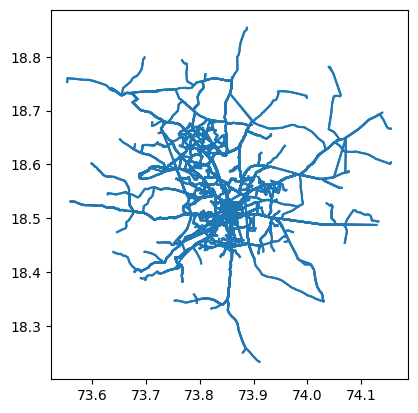

In [37]:
gdf1.plot()

### export route lines as .geojson

In [38]:
gdf1.to_file('trip-lines.geojson')